In [26]:
# Examen 1 de Análisis de datos atmosféricos.
# CCA - UNAM - maestría.
# 2 de septiembre de 2021.

import pandas as pd
import numpy as np

from scipy import stats

from matplotlib import pyplot as plt

In [24]:
# Datos para los ejercicios 6, 7, 8.

path = "../datos/"
fname = "A.3_Wilks.csv"

df = pd.read_csv(path + fname, index_col = "Year")

df.head()

,Temperature,Precipitation,Pressure,El Niño
Year,,,,
1951,26.1,43.0,1009.5,True
1952,24.5,10.0,1010.9,False
1953,24.8,4.0,1010.7,True
1954,24.5,0.0,1011.2,False
1955,24.1,2.0,1011.9,False


C:\Users\Rodrigo\anaconda3\envs\gv2\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x000001C9BF4A5788> has a label of '_' which cannot be automatically added to the legend.
  


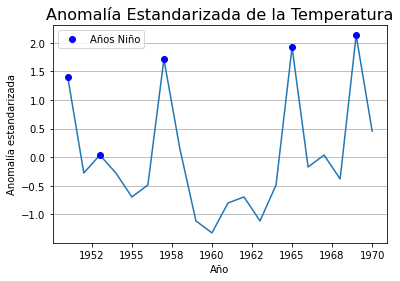

In [67]:
# Ejercicio 6.
# Anomalía estandarizada.

df["z Temp"] = stats.zscore(df["Temperature"])

ax = df["z Temp"].plot(legend = True)
( df["z Temp"].where(df["El Niño"] == True)
    .plot(linestyle = "", marker = "o", 
    color = "blue", legend = True, ax = ax) )

plt.title("Anomalía Estandarizada de la Temperatura",
    fontsize = 16)
plt.xlabel("Año")
plt.ylabel("Anomalía estandarizada")
plt.legend(["_", "Años Niño"])
plt.grid(axis = "y")

ax.xaxis.set_major_formatter("{x:.0f}")

C:\Users\Rodrigo\anaconda3\envs\gv2\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The handle <matplotlib.collections.PathCollection object at 0x000001C9BE3F2CC8> has a label of '_' which cannot be automatically added to the legend.
  if sys.path[0] == '':


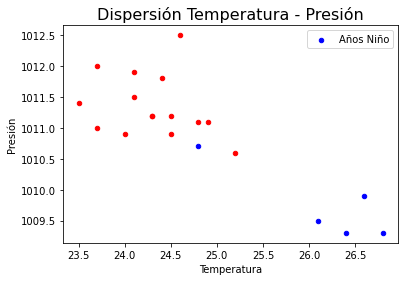

In [68]:
# Ejercicio 7.
# Dispersión.

ax = ( df.where(df["El Niño"] == True).plot
    .scatter("Temperature", "Pressure", c = "blue") )
( df.where(df["El Niño"] == False).plot
    .scatter("Temperature", "Pressure", c = "red", ax = ax) )

plt.title("Dispersión Temperatura - Presión",
    fontsize = 16)
plt.xlabel("Temperatura")
plt.ylabel("Presión")
plt.legend(["Años Niño", "_"])

In [47]:
# Ejercicio 8.
# Correlaciones.

corr = [df.loc[:, ["Temperature","Pressure"]].corr().iat[1, 0],
    df.loc[:, ["Temperature","Pressure"]].corr("spearman").iat[1, 0]]

tipo = ["Pearson:  ", "Spearman: "]

for i in range(len(tipo)):
    print("Correlación de " + tipo[i]
        + f"{corr[i]:.3f}")

Correlación de Pearson:  -0.830
Correlación de Spearman: -0.688


In [69]:
# Datos ejercicio 9.

fname = "SN_m_tot_V2.0.csv"

sunspot = "Monthly Sunspots"
cols = ["Year", "Month", "Year Fraction", 
    sunspot, "Monthly Mean Std",
    "Number of Observations",
    "Definitive/provisional marker"]

sol = pd.read_csv(path + fname, sep = ";",
    names = cols, index_col = cols[0])

# Se convierte el valor -1 a np.nan
sol = sol.where(sol > -1, np.nan)

k recomendado: 13.0
ancho de intervalo: 15.32


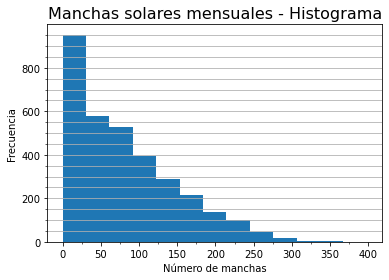

In [125]:
# Ejercicio 9.a.
# Histograma.

k = np.ceil(1 + 3.3 *np.log10(sol.shape[0]))

print("k recomendado: " + k.astype(str)
    )
    
fig, ax = plt.subplots()
n, bins, patches = ax.hist(sol[sunspot], bins = k.astype(int))

plt.title("Manchas solares mensuales - Histograma",
    fontsize = 16)
plt.xlabel("Número de manchas")
plt.ylabel("Frecuencia")
plt.grid(axis = "y", which = "both")

ax.xaxis.set_major_locator(plt.MultipleLocator(50))
ax.xaxis.set_minor_locator(plt.MultipleLocator(25))
ax.yaxis.set_major_locator(plt.MultipleLocator(200))
ax.yaxis.set_minor_locator(plt.MultipleLocator(50))

print( "ancho de intervalo: " + 
    f"{ bins[1]:.2f}")

In [74]:
# Ejercicio 9.b.
# Estadísticos.

print("Media:   " + f"{sol[sunspot].mean():.2f}")
print("Mediana: " + f"{sol[sunspot].median():.2f}")
print("Moda:    " + f"{bins[1] / 2:.2f}")
print("IQR:     " +
    f"{sol[sunspot].quantile(0.75) - sol[sunspot].quantile(0.25):.2f}")

Media:   81.65
Mediana: 66.95
Moda:    25.00
IQR:     98.63


Text(0, 0.5, 'Número de manchas')

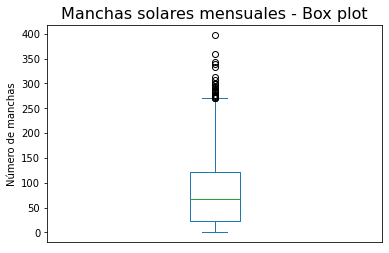

In [77]:
# Ejercicio 9.c.
# Box plot.

sol[sunspot].plot.box()

plt.title("Manchas solares mensuales - Box plot",
    fontsize = 16)
plt.xticks([])
plt.ylabel("Número de manchas")

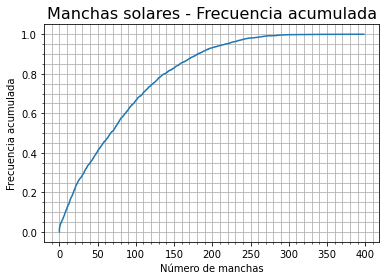

In [97]:
# Ejercicio 9.d.
# Frecuencia acumulada.

fig, ax = plt.subplots()
# Criterio de Weibull.
ax.plot(sol[sunspot].sort_values(),
    range(1, sol.shape[0] + 1) /
    np.float64(sol.shape[0] + 1)
    )

plt.title("Manchas solares - Frecuencia acumulada",
    fontsize = 16)
plt.grid(True, which = "both")
plt.xlabel("Número de manchas")
plt.ylabel("Frecuencia acumulada")

ax.xaxis.set_major_locator(plt.MultipleLocator(50))
ax.xaxis.set_minor_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.05))

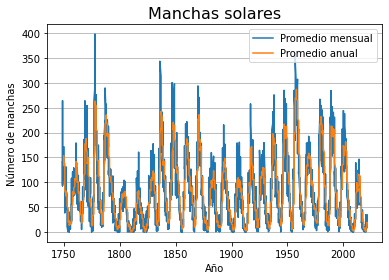

In [78]:
# Ejercicio 9.f.
# Media móvil.

sol["rolling mean"] = sol[sunspot].rolling(13).mean()

sol[[sunspot, "rolling mean"]].plot()

plt.title("Manchas solares",
    fontsize = 16)
plt.xlabel("Año")
plt.ylabel("Número de manchas")
plt.grid(axis = "y")
plt.legend(["Promedio mensual", "Promedio anual"])

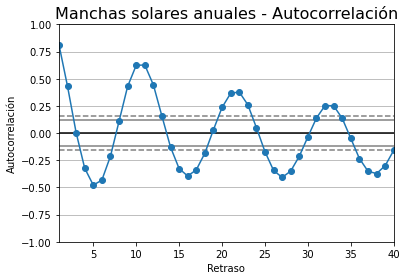

In [81]:
# Ejercicio 9.g.
# Autocorrelación.

sol_anual = sol[sunspot].groupby("Year").mean().to_frame()
sol_anual.rename(columns = {"Monthly Sunspots": "Sunspots"},
    inplace = True)

pd.plotting.autocorrelation_plot(
        sol_anual, marker = "o").set_xlim([1, 40])
plt.title("Manchas solares anuales - Autocorrelación",
    fontsize = 16)
plt.xlabel("Retraso")
plt.ylabel("Autocorrelación")
plt.grid(axis = "x")